In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [3]:
train_generator = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [7]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , activation='relu', input_shape=[64,64,3]))

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [13]:
history = cnn.fit(x = train_generator, validation_data = validation_generator, epochs=2)

Epoch 1/2
250/250 [==============================] - 208s 817ms/step - loss: 0.6695 - accuracy: 0.5771 - val_loss: 0.6264 - val_accuracy: 0.6375
Epoch 2/2
250/250 [==============================] - 132s 528ms/step - loss: 0.6226 - accuracy: 0.6506 - val_loss: 0.6128 - val_accuracy: 0.6660


In [30]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/sample/dog.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [31]:
prediction

'dog'

In [32]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


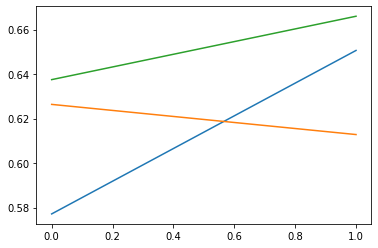

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])